In [1]:
import xgboost as xgb
from gradient_boosted_trees import GradientBoostedTreesModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/Users/ebensen/opt/anaconda3/envs/ai_bias/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Generate Data

In [2]:
# generate some data
np.random.seed(0)
n = 1000
p = 10
X = np.hstack([np.linspace(0,100,n) for i in range(p)]).reshape(n,p)
y = np.array([sum(X[i,:]**2) + np.random.randn() for i in range(n)])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
# convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Custom XGB Random Forest

In [4]:
params={'num_boost_round': 100}
model = GradientBoostedTreesModel(**params)
model.train(dtrain)

In [5]:
ypred = model.predict(dtest)
np.mean(y_train)

32351.332888689907

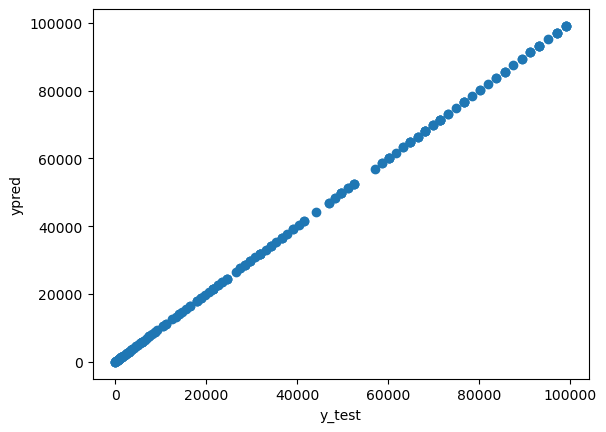

In [6]:
plt.scatter(y_test, ypred)
plt.xlabel('y_test')
plt.ylabel('ypred')
plt.show()

# SKlearn interface GBT

In [7]:
model = GradientBoostingRegressor(n_estimators=100).fit(X_train, y_train)

In [8]:
ypred = model.predict(X_test)

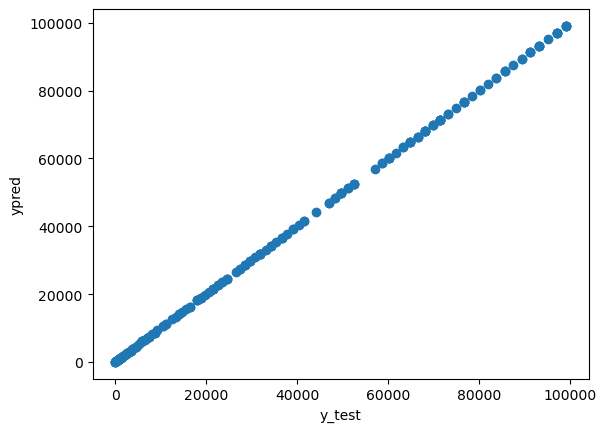

In [9]:
plt.scatter(y_test, ypred)
plt.xlabel('y_test')
plt.ylabel('ypred')
plt.show()